In [41]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [42]:
img = cv2.imread('./test_images/CR71.jpg')
img.shape

(647, 970, 3)

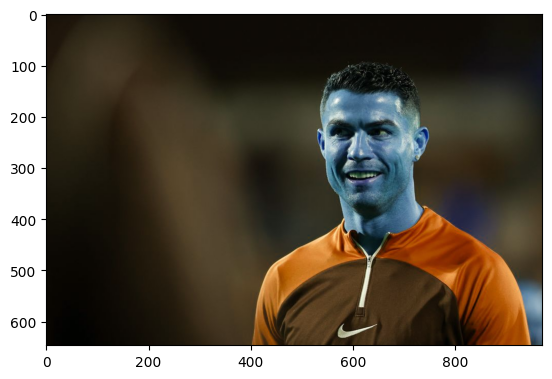

In [43]:
plt.imshow(img)

In [44]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(647, 970)

In [45]:
gray

array([[17, 17, 17, ..., 13, 12, 12],
       [17, 17, 17, ..., 13, 12, 12],
       [17, 17, 17, ..., 13, 12, 12],
       ...,
       [ 6,  6,  5, ..., 94, 96, 96],
       [ 6,  6,  5, ..., 94, 94, 94],
       [ 6,  6,  5, ..., 94, 93, 93]], dtype=uint8)

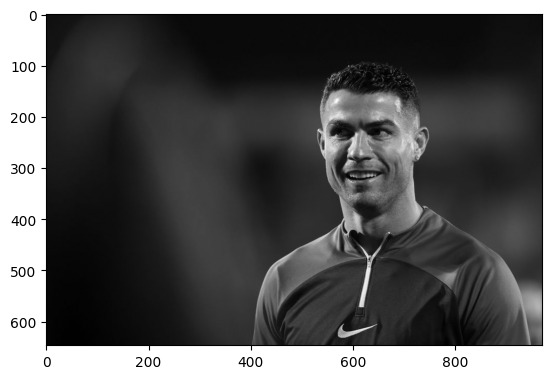

In [46]:

plt.imshow(gray, cmap='gray')

In [47]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[515, 154, 196, 196]])

In [48]:
(x,y,w,h) = faces[0]
x,y,w,h

(515, 154, 196, 196)

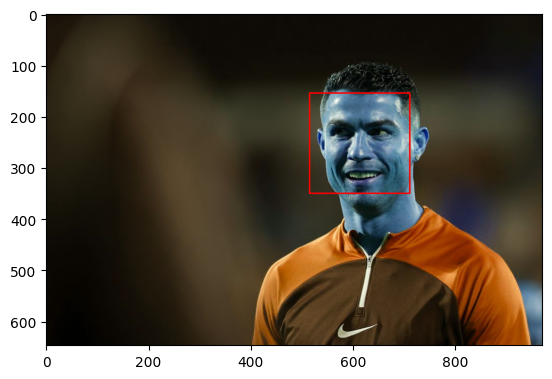

In [49]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

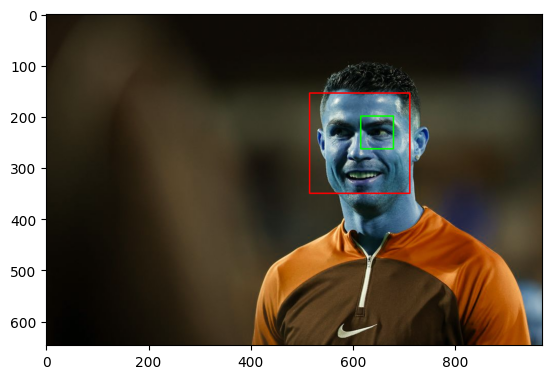

In [50]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [51]:
cropped_img = np.array(roi_color)
cropped_img.shape

(196, 196, 3)

Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region

In [52]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color # if there 2 images, it return the first one, it can clean manually
        

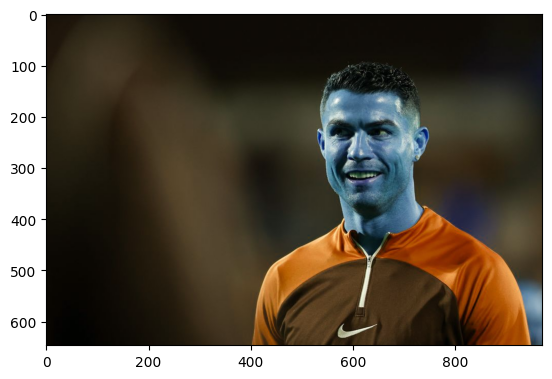

In [53]:
original_image = cv2.imread('./test_images/CR71.jpg')
plt.imshow(original_image)

in this CR71.ipg image number of detected is one, so it not return no image, it mean discard this image

In [54]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/CR71.jpg')
cropped_image

in the following messi1.jpg image 2 eyes detected, so it can return face crop image

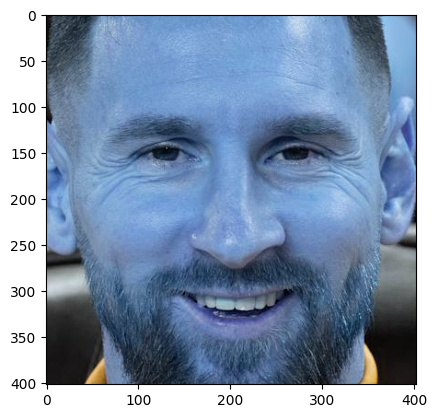

In [55]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/messi1.jpg')
plt.imshow(cropped_image)

In [56]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [57]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [58]:
img_dirs

['./dataset/cristiano_ronaldo',
 './dataset/lionel_messi',
 './dataset/serena_williams',
 './dataset/virat_kohli']

Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after run this code

In [59]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [60]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cristiano_ronaldo
Generating cropped images in folder:  ./dataset/cropped/cristiano_ronaldo
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [73]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'cristiano_ronaldo': ['./dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo1.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo10.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo11.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo12.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo13.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo14.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo15.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo16.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo17.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo18.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo19.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo2.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo20.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo21.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo

Now you should have cropped folder under datasets folder that contains cropped images.
Manually examine cropped folder and delete any unwanted images

(3) Preprocessing: Use wavelet transform as a feature for traning our model

In wavelet transformed image, can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [90]:
# Wavelet transform got from stack overflow website
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

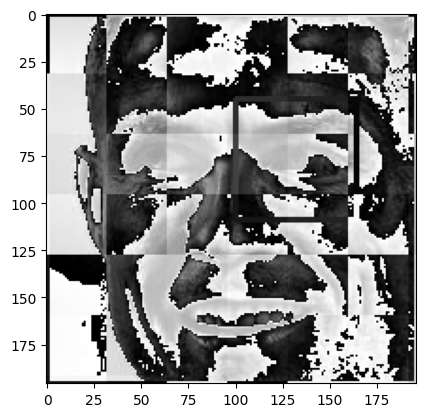

In [91]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

Images in cropped folder can be used for model training. Use these raw images along with wavelet transformed images to train our classifier.

In [92]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cristiano_ronaldo': 0,
 'lionel_messi': 1,
 'serena_williams': 2,
 'virat_kohli': 3}

In [93]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None: # if image is not found, it will skip bcs we manually delete some images.
            continue
        scalled_raw_img = cv2.resize(img, (32, 32)) # resize image to 32x32 bcs training model need same size
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [94]:
len(X)


95

In [95]:
len(X[0])

4096

In [96]:
32*32*3 + 32*32*1

4096

In [97]:
X[0]

array([[ 62],
       [ 61],
       [ 65],
       ...,
       [248],
       [ 24],
       [183]], dtype=uint8)

In [98]:
y[0]

0

In [99]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(95, 4096)

Now ready to train our model

use SVM with rbf kernel tuned with heuristic finetuning

In [100]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8333333333333334

In [102]:
len(X_test)

24

In [103]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.75      0.75      0.75         4
           2       0.80      0.80      0.80         5
           3       0.86      1.00      0.92         6

    accuracy                           0.83        24
   macro avg       0.82      0.83      0.82        24
weighted avg       0.83      0.83      0.83        24



Use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [104]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [105]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [106]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])  # pipeline => step 1: scale the data first then step 2: used the model to train
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

d:\Cursor Document\Sports-celebrity-Classificatio\venv311_py311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Cursor Document\Sports-celebrity-Classificatio\venv311_py311\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
d:\Cursor Document\Sports-celebrity-Classificatio\venv311_py311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leav

,model,best_score,best_params
0,svm,0.815238,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.660000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.829524,{'logisticregression__C': 1}


the above accuracy is validation test. it mean GridSearchCV split the data set into validate data and test data. then above the accuracy come from validate data set. next following we can use the test data set to check the accuracy for test data test

In [107]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

the following test data set to check the accuracy for test data test

In [108]:
best_estimators['svm'].score(X_test,y_test)

0.8333333333333334

In [109]:
best_estimators['random_forest'].score(X_test,y_test)

0.7916666666666666

In [110]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.875

In [111]:
best_clf = best_estimators['svm']

In [112]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[7, 0, 1, 1],
       [1, 3, 0, 0],
       [1, 0, 4, 0],
       [0, 0, 0, 6]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

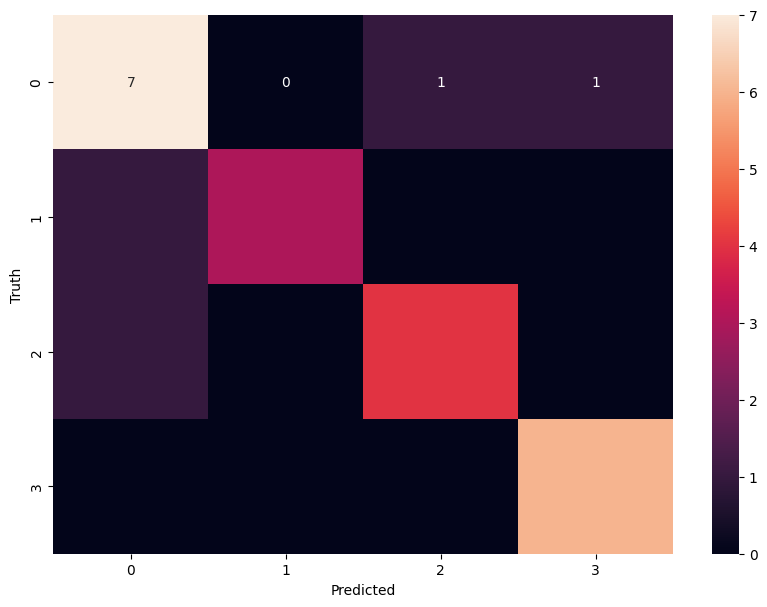

In [113]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [114]:
class_dict

{'cristiano_ronaldo': 0,
 'lionel_messi': 1,
 'serena_williams': 2,
 'virat_kohli': 3}

Save the trained model

In [115]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

Save class dictionary

In [116]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

at this point job of data scientist is overrrr! 